# Learning the topology of a Bayesian Network from data: the K2 algorithm
***

Inputs to the Algorithm: <br>
1. a set of $N$ nodes
2. an ordering of the nodes
3. upper bound $u$ of possible parents
4. database $D$ containing $m$ cases

I would split up the code into three functions, one for the iteration over the nodes, one for the probability P and one for alpha.
Also I would suggest D to be a Dataframe and to get the number of possible values of a node we just do 'unique'

In [319]:
source('K2.R')
source('plot_graph.R')
library(dplyr)
library(gtools)
library(igraph)
require('data.table')


###### Suggested Dataset 

   x1 x2 x3
1   1  0  0
2   1  1  1
3   0  0  1
4   1  1  1
5   0  0  0
6   0  1  1
7   1  1  1
8   0  0  0
9   1  1  1
10  0  0  0
Parents of node  1 :	  
Parents of node  2 :	  1
Parents of node  3 :	  2


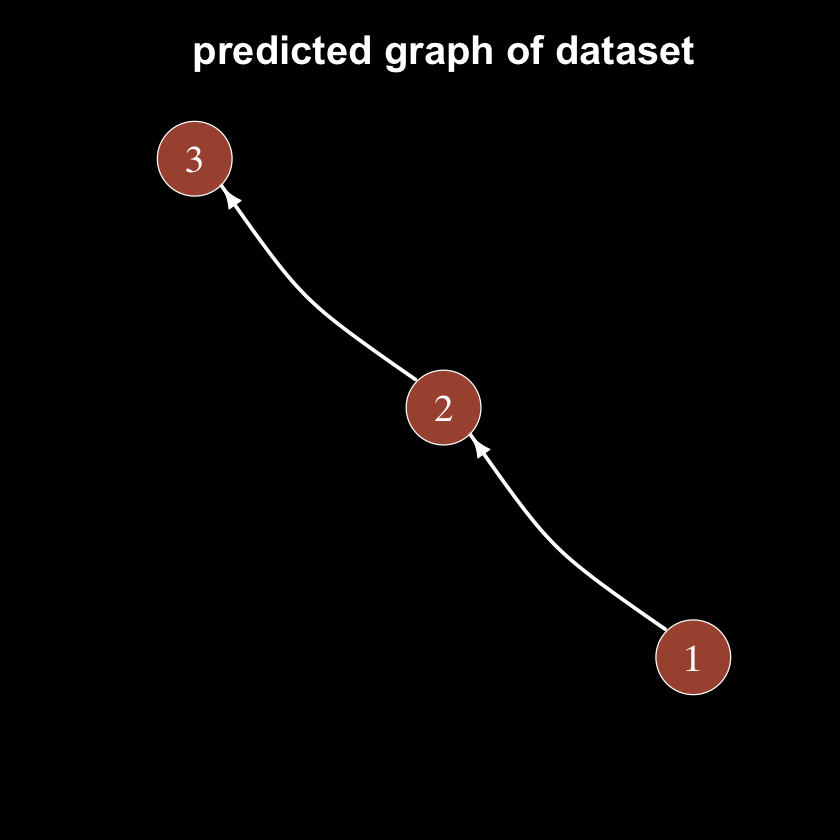

In [320]:
x1 <- c(1,1,0,1,0,0,1,0,1,0)
x2 <- c(0,1,0,1,0,1,1,0,1,0)
x3<- c(0,1,1,1,0,1,1,0,1,0)

D <- data.frame(x1, x2, x3)
print(D)
parents <- k2(c(1,2,3), 2, D, print_result = TRUE)
plot_graph(parents)

In [321]:
parents

[[1]]
numeric(0)

[[2]]
[1] 1

[[3]]
[1] 2

## randomly larger dataset with more possible parents

   x1 x2 x3 x4 x5 x6 x7 x8 x9 x10
1   1  0  0  1  1  1  1  1  1   1
2   1  1  0  0  1  0  0  0  0   1
3   0  0  1  1  1  0  1  1  0   1
4   1  1  0  0  0  0  1  0  1   1
5   0  0  0  1  1  0  1  1  1   1
6   0  1  0  0  0  0  1  1  1   0
7   1  1  0  0  1  1  0  1  1   0
8   0  0  0  0  0  0  0  1  1   0
9   1  1  0  0  1  0  1  1  0   0
10  0  0  0  1  1  1  0  1  1   1
Parents of node  1 :	  
Parents of node  2 :	  1
Parents of node  3 :	  
Parents of node  4 :	  2
Parents of node  5 :	  4, 1
Parents of node  6 :	  5
Parents of node  7 :	  6
Parents of node  8 :	  1
Parents of node  9 :	  3, 1, 6, 5
Parents of node  10 :	  4, 8


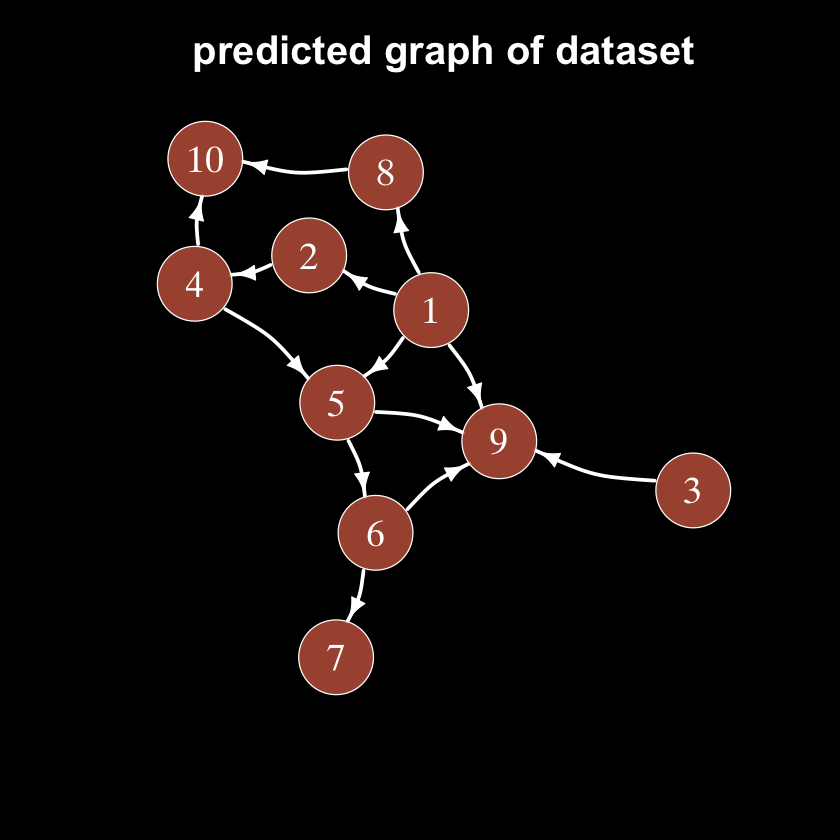

In [324]:
#create dataframe
x1 <- c(1,1,0,1,0,0,1,0,1,0)
x2 <- c(0,1,0,1,0,1,1,0,1,0)
x3<- c(0,0,1,0,0,0,0,0,0,0)
x4<- c(1,0,1,0,1,0,0,0,0,1)
x5<- c(1,1,1,0,1,0,1,0,1,1)
x6<- c(1,0,0,0,0,0,1,0,0,1)
x7<- c(1,0,1,1,1,1,0,0,1,0)
x8<- c(1,0,1,0,1,1,1,1,1,1)
x9<- c(1,0,0,1,1,1,1,1,0,1)
x10<- c(1,1,1,1,1,0,0,0,0,1)
D <- data.frame(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10)
print(D)
parents <- k2(c(1,2,3,4,5,6,7,8,9,10), 10, D)
plot_graph(parents)

## Dataset with floats and bigger ints

     x1   x2   x3   x4   x5  x6   x7
1   0.1  0.0  0.0 11.0  1.0 1.0  1.0
2  20.0  1.0  0.7  0.3 13.0 0.4  0.4
3   0.0  0.3 15.0 28.0 21.0 0.6  1.4
4   1.0 19.0  1.0  0.8  0.0 0.7  1.0
5   0.3  0.9  0.0  0.3 11.0 0.0  1.0
6   0.9  1.0  0.8  0.0  0.2 0.9 12.0
7   1.0  1.0 12.0 12.0 11.0 1.0  0.4
8   0.3  0.5  0.4  0.0 10.0 0.0 10.0
9  31.0  1.0  1.0  0.9 12.0 0.5  1.0
10  0.0  0.5  0.1  1.0 13.0 1.0 21.0
Parents of node  1 :	  
Parents of node  2 :	  1
Parents of node  3 :	  1, 2
Parents of node  4 :	  3, 1
Parents of node  5 :	  1, 2
Parents of node  6 :	  5, 4
Parents of node  7 :	  4, 5


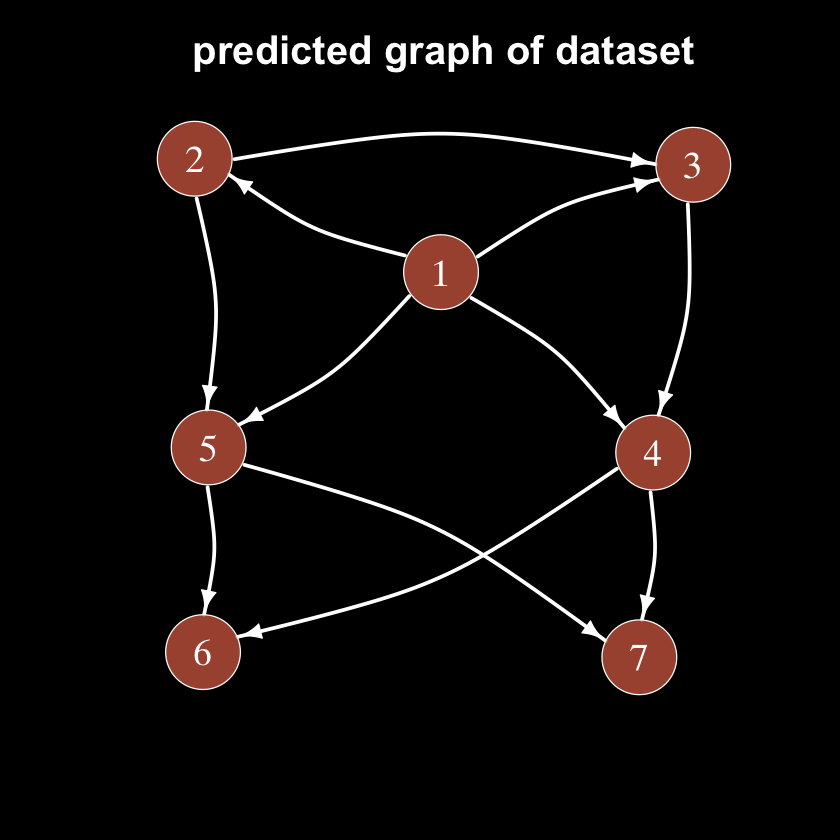

In [328]:
x1 <- c(0.1,20,0,1,0.3,0.9,1,0.3,31,0)
x2 <- c(0,1,0.3,19,0.9,1,1,0.5,1,0.5)
x3<- c(0,0.7,15,1,0,0.8,12,0.4,1,0.1)
x4<- c(11,0.3,28,0.8,0.3,0,12,0,0.9,1)
x5<- c(1,13,21,0,11,0.2,11,10,12,13)
x6<- c(1,0.4,0.6,0.7,0,0.9,1,0,0.5,1)
x7<- c(1,0.4,1.4,1,1,12,0.4,10,1,21)
D <- data.frame(x1, x2, x3, x4, x5, x6, x7)
print(D)
parents <- k2(c(1,2,3,4,5,6,7), 2, D, print_result = TRUE)
plot_graph(parents)

## Computing time of Probability VS Log Probability implementations

In [107]:
# data

In [141]:
start.time <- proc.time()
# computation
end.time <- proc.time()
time.taken <- end.time - start.time
cat(noquote(paste("Time taken for normal probability (s):\n")))
time.taken

Time taken for normal probability (s):


   user  system elapsed 
  0.001   0.000   0.002 

In [142]:
start.time <- proc.time()
# computation
end.time <- proc.time()
time.taken <- end.time - start.time
cat(noquote(paste("Time taken for log probability (s):\n")))
time.taken

Time taken for log probability (s):


   user  system elapsed 
  0.004   0.000   0.003 

## Relative probabilities of network structures


   x1 x2 x3
1   1  0  0
2   1  1  1
3   0  0  1
4   1  1  1
5   0  0  0
6   0  1  1
7   1  1  1
8   0  0  0
9   1  1  1
10  0  0  0
[1] "For node  2  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  2  permutation: "
[1]  1 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  1, NA
Parents of node  3 :	  1, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


[1] "For node  2  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  2  permutation: "
[1]  1 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  1, NA
Parents of node  3 :	  1, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


[1] "For node  2  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  2  permutation: "
[1]  2 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  NA
Parents of node  3 :	  2, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


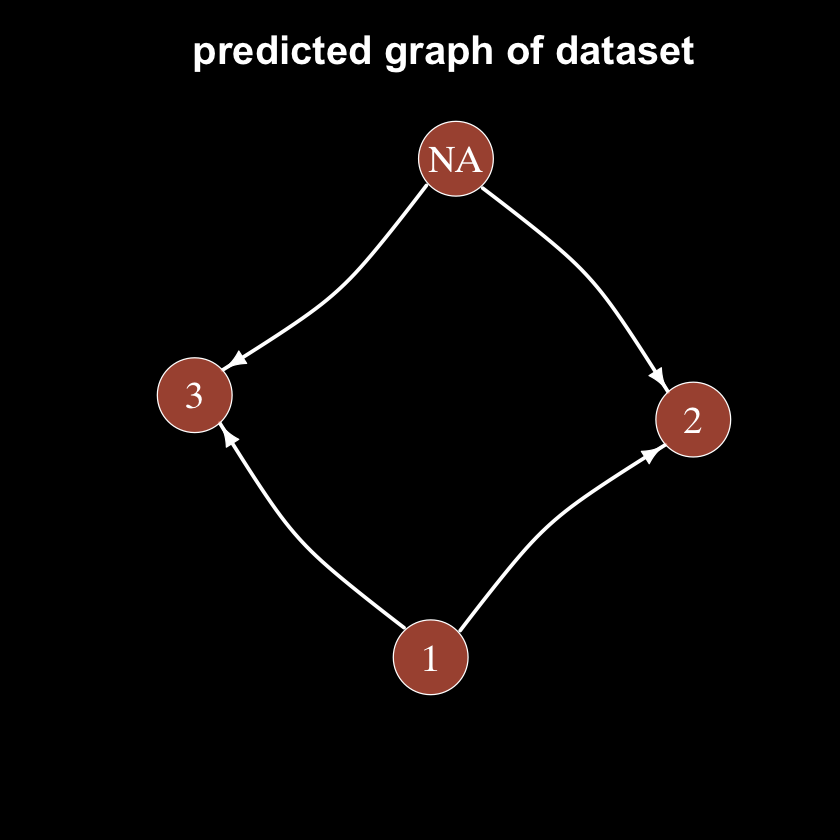

[1] "For node  2  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  2  permutation: "
[1]  2 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  NA
Parents of node  3 :	  2, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


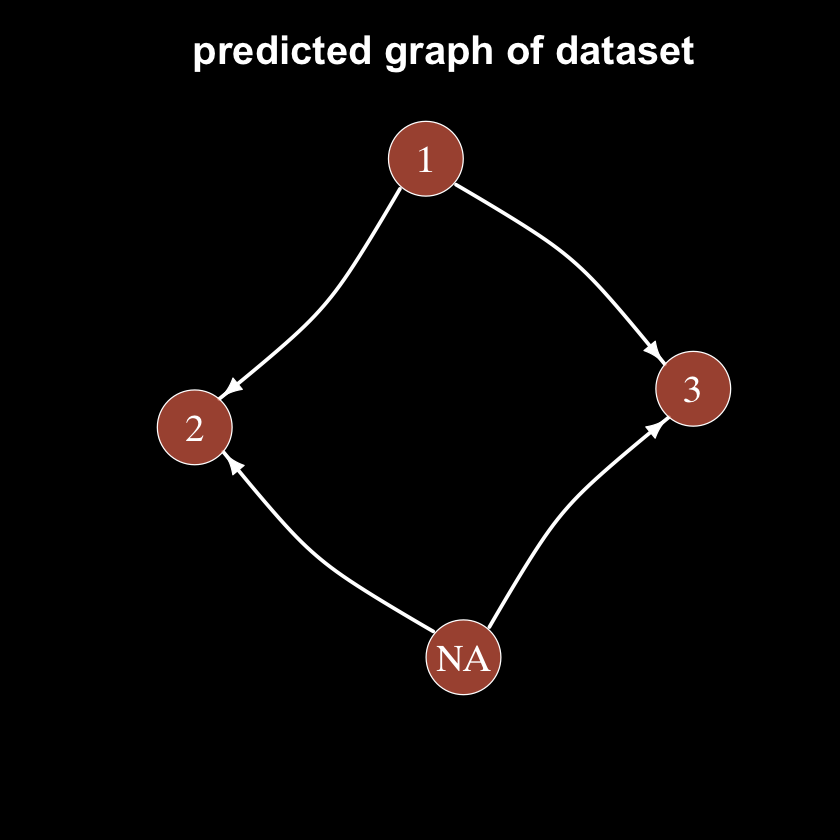

[1] "For node  2  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  2  permutation: "
[1]  3 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  3, NA
Parents of node  3 :	  NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


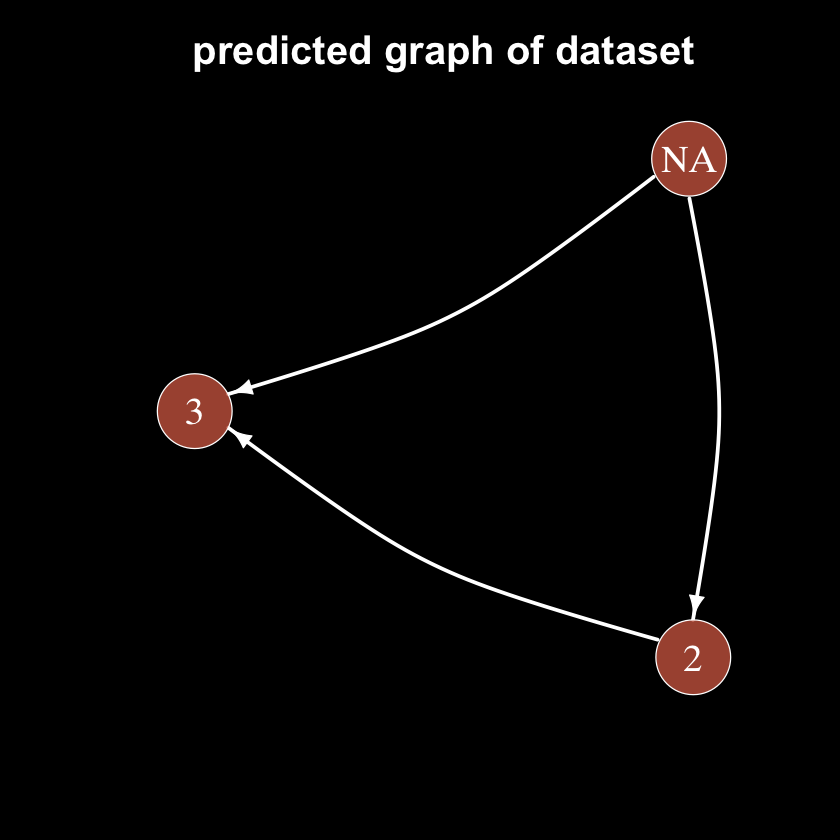

[1] "For node  2  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  2  permutation: "
[1]  3 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  3, NA
Parents of node  3 :	  NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


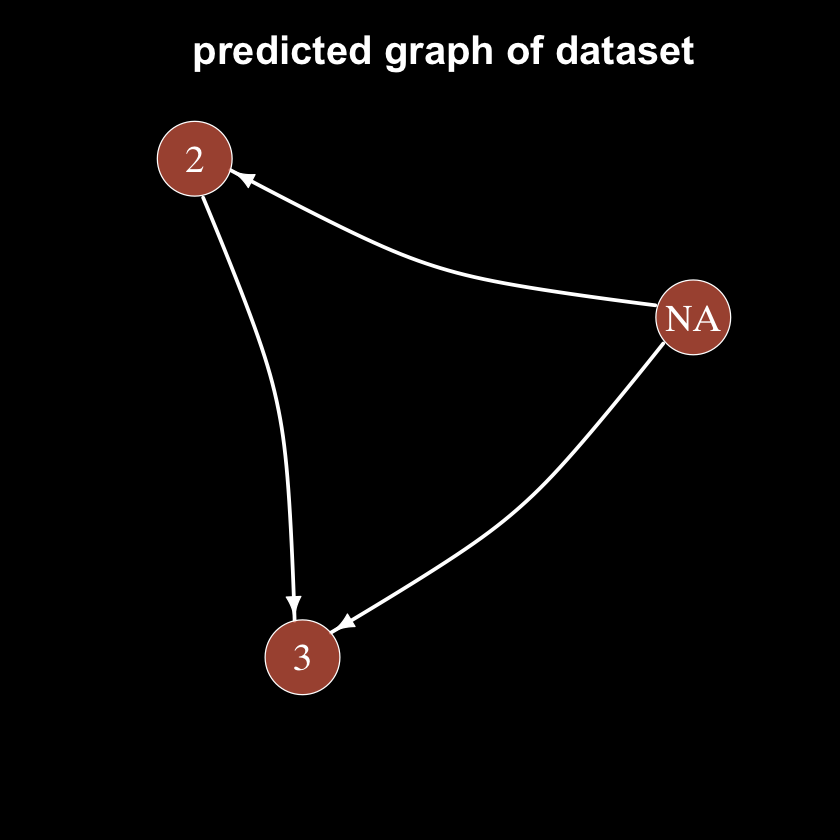

[1] "For node  2  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  2  permutation: "
[1]  2 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  NA
Parents of node  3 :	  2, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


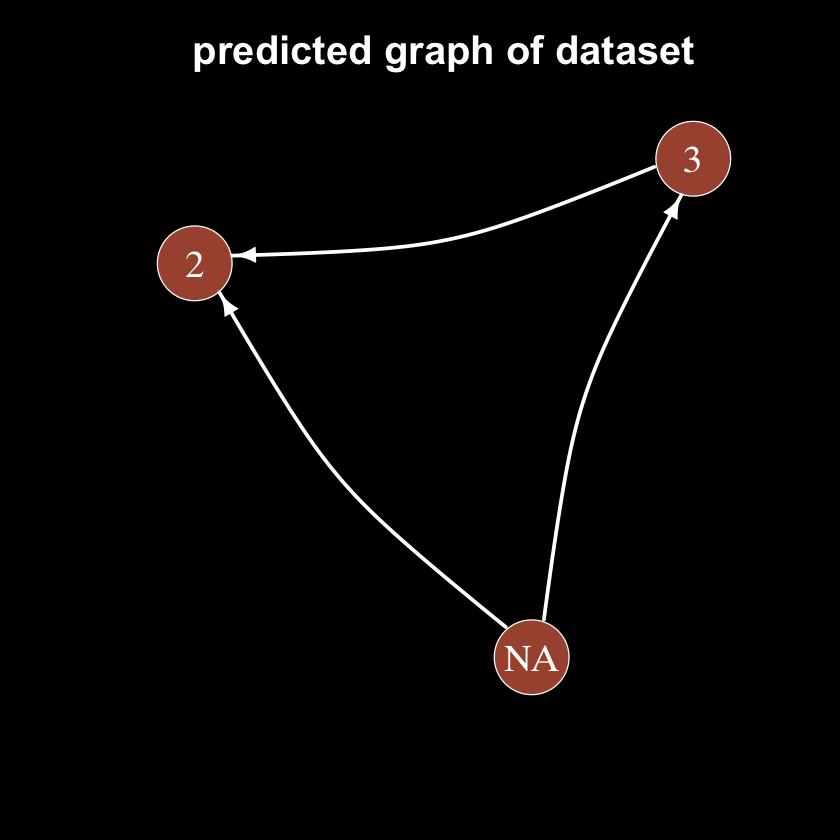

[1] "For node  2  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  2  permutation: "
[1]  3 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  3, NA
Parents of node  3 :	  NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


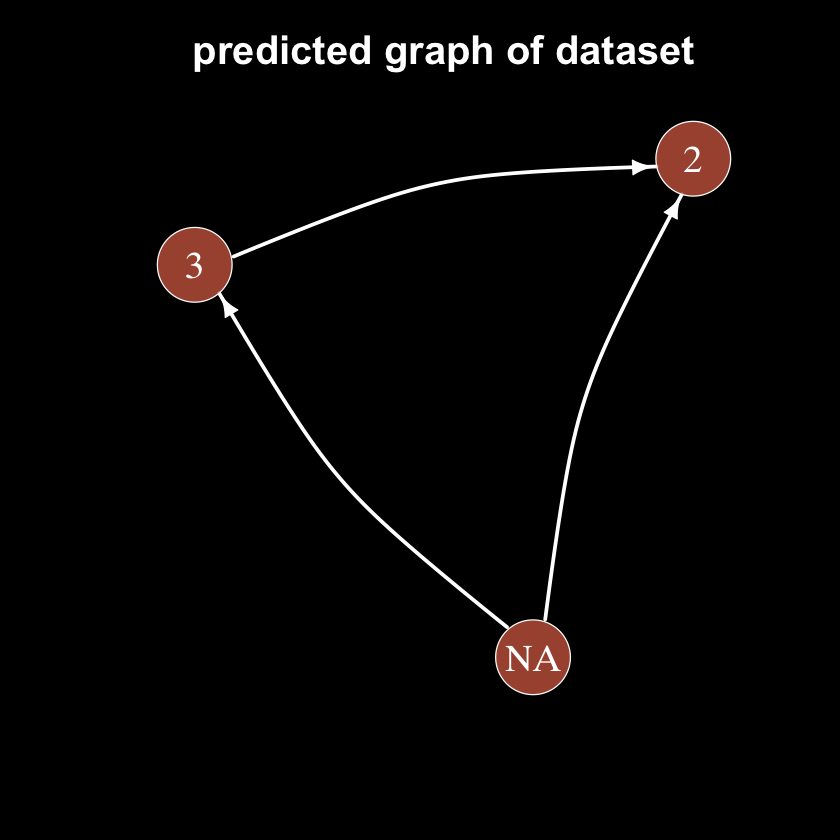

[1] "For node  2  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  2  permutation: "
[1]  1 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  1, NA
Parents of node  3 :	  1, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


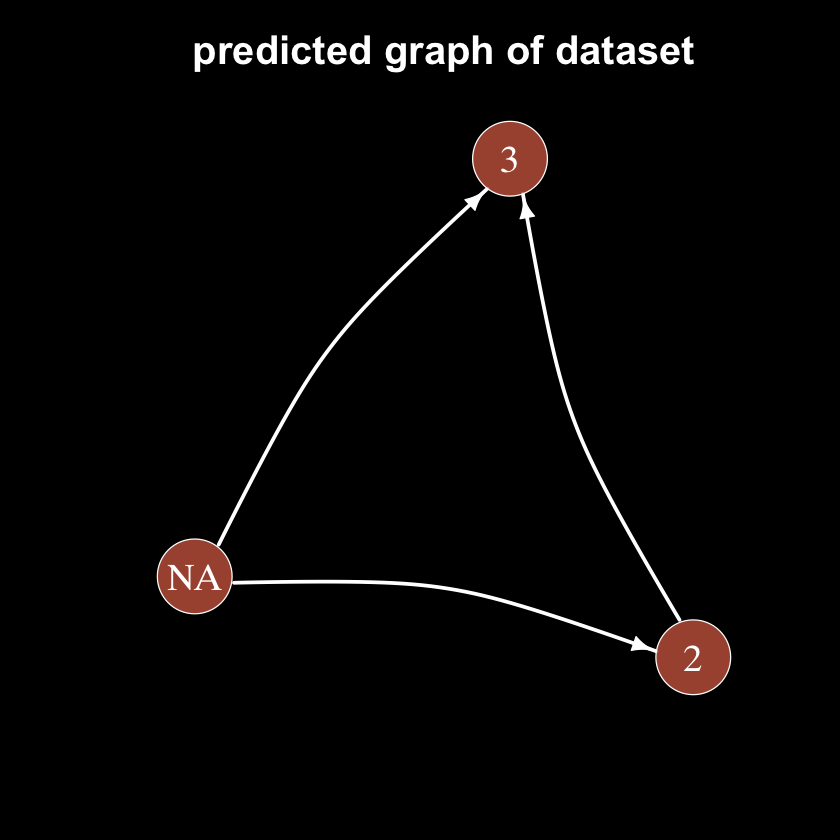

[1] "For node  2  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  2  permutation: "
[1]  3 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  3, NA
Parents of node  3 :	  NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


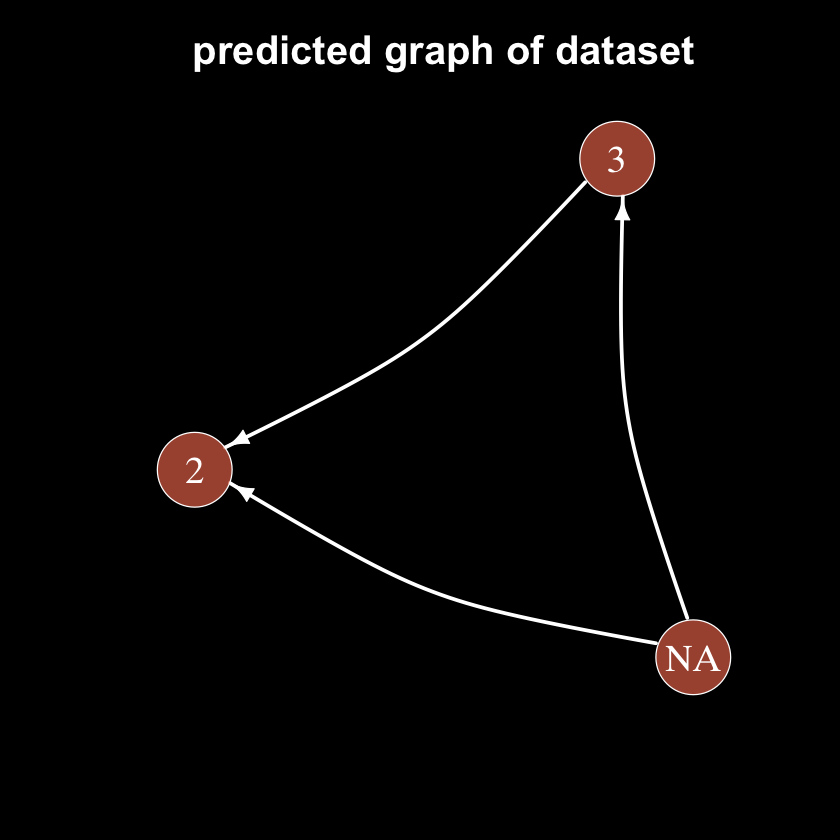

[1] "For node  2  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  2  permutation: "
[1]  1 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  1, NA
Parents of node  3 :	  1, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


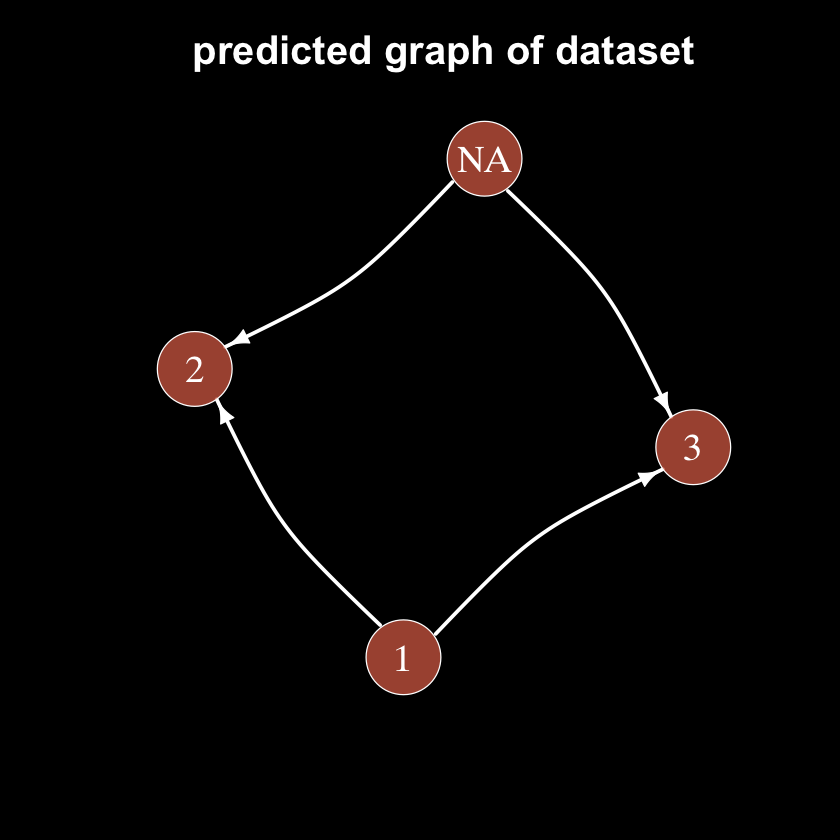

[1] "For node  2  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  2  permutation: "
[1]  2 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  NA
Parents of node  3 :	  2, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


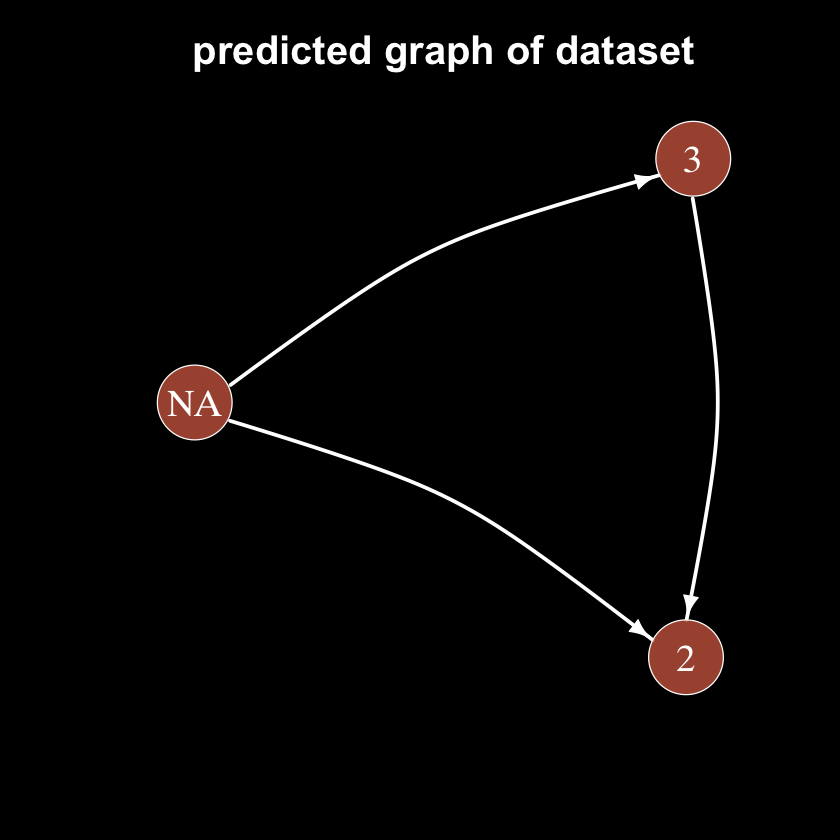

[1] "For node  2  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  2  permutation: "
[1]  3 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  3, NA
Parents of node  3 :	  NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


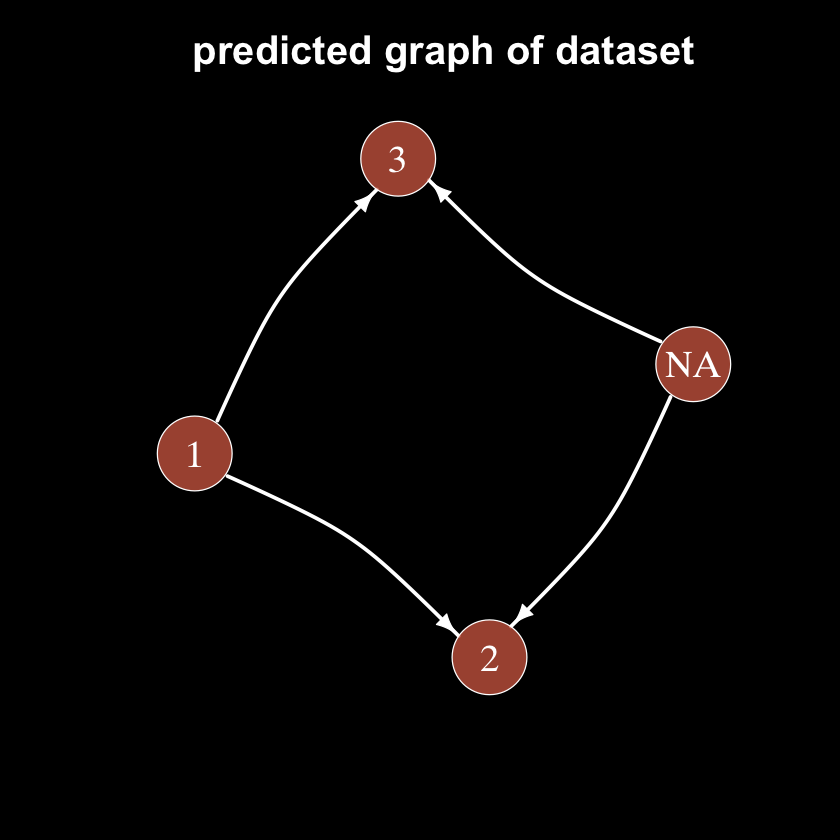

[1] "For node  2  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  2  permutation: "
[1]  2 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  NA
Parents of node  3 :	  2, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


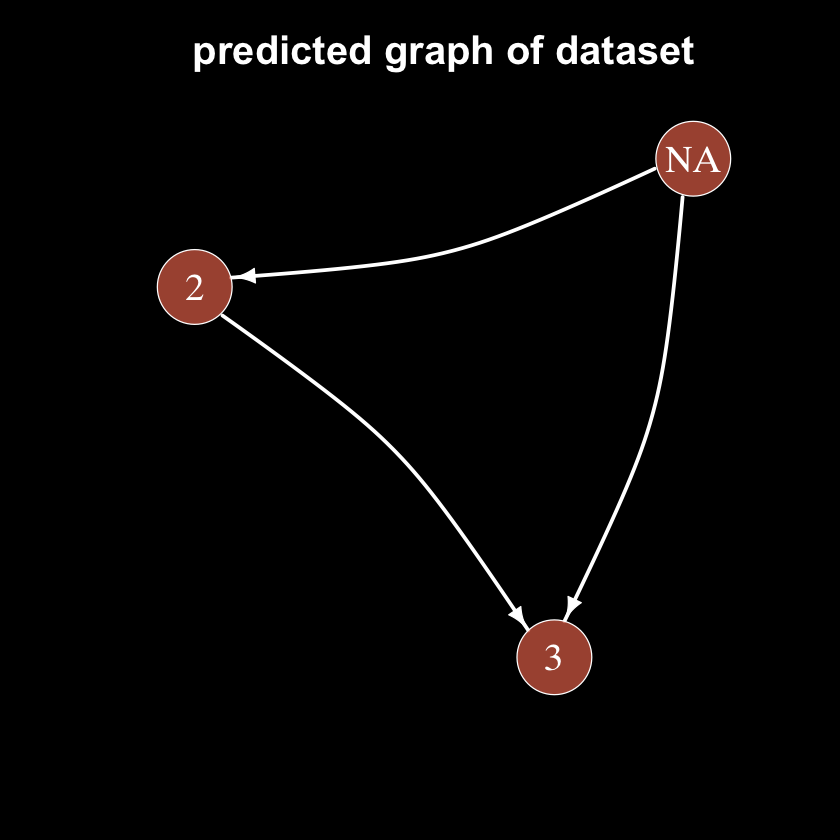

[1] "For node  2  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  1  permutation: "
[1]  3 NA
[1] "For node  3  and s  2  permutation: "
[1]  3 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  3, NA
Parents of node  3 :	  NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


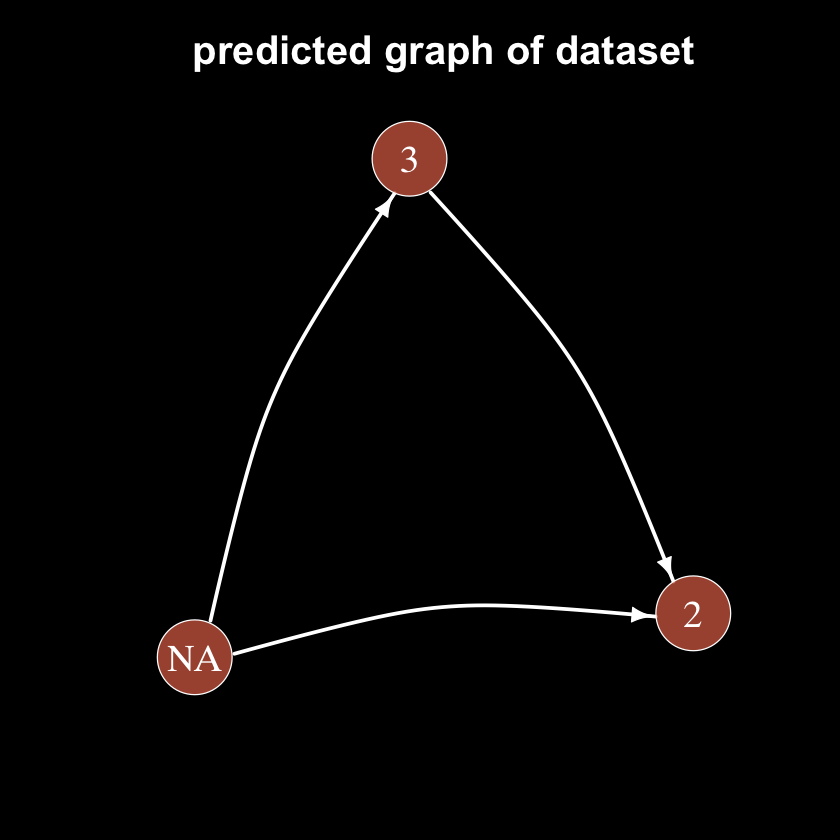

[1] "For node  2  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  2  permutation: "
[1]  1 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  1, NA
Parents of node  3 :	  1, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


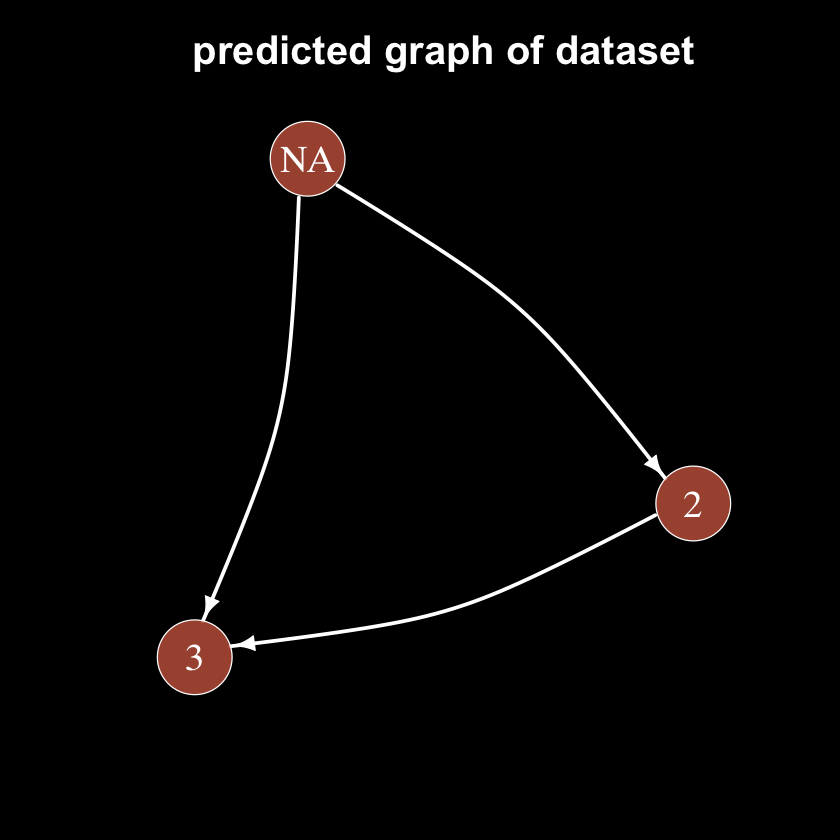

[1] "For node  2  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  1  permutation: "
[1]  2 NA
[1] "For node  3  and s  2  permutation: "
[1]  2 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  NA
Parents of node  3 :	  2, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


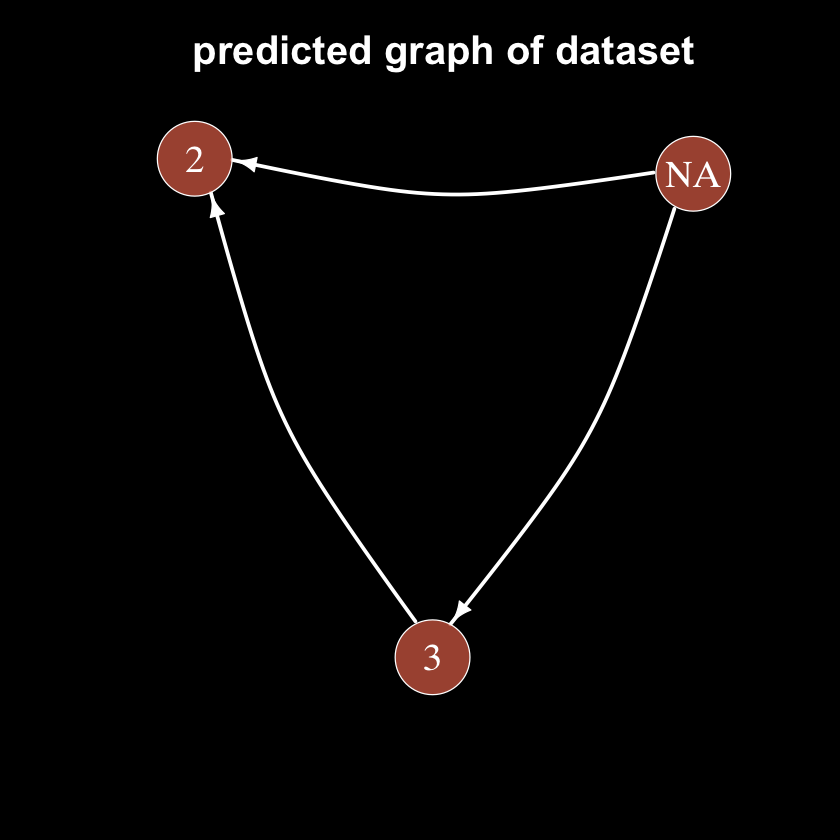

[1] "For node  2  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  1  permutation: "
[1]  1 NA
[1] "For node  3  and s  2  permutation: "
[1]  1 NA
[1] "For node  3  and s  3  permutation: "
[1] NA NA
Parents of node  2 :	  1, NA
Parents of node  3 :	  1, NA


Warning message in graph_from_data_frame(d = links, directed = T):
“In `d' `NA' elements were replaced with string "NA"”


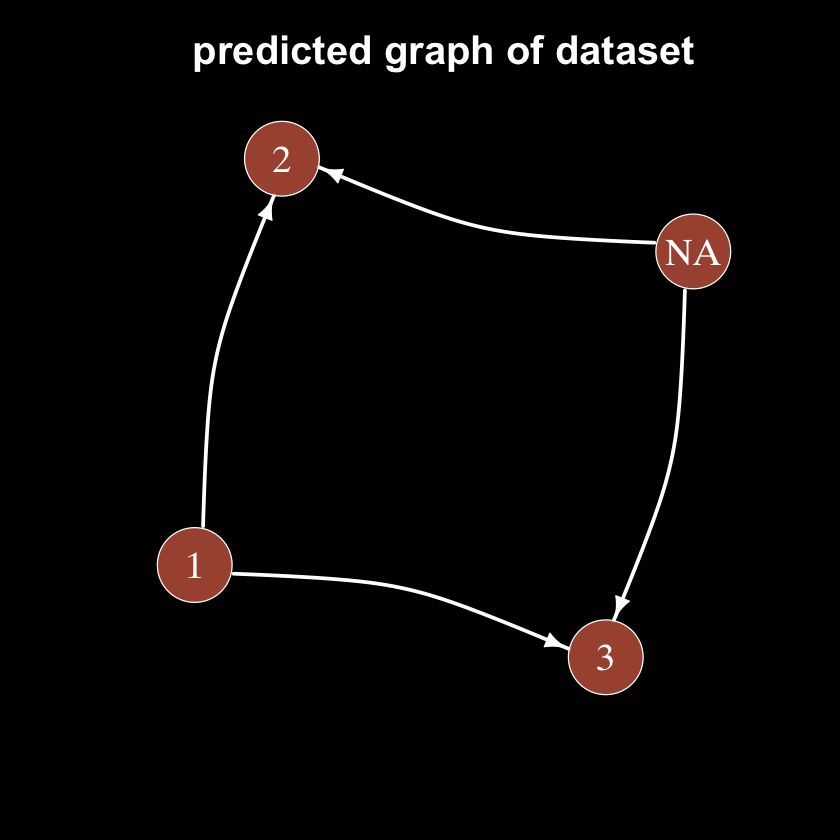

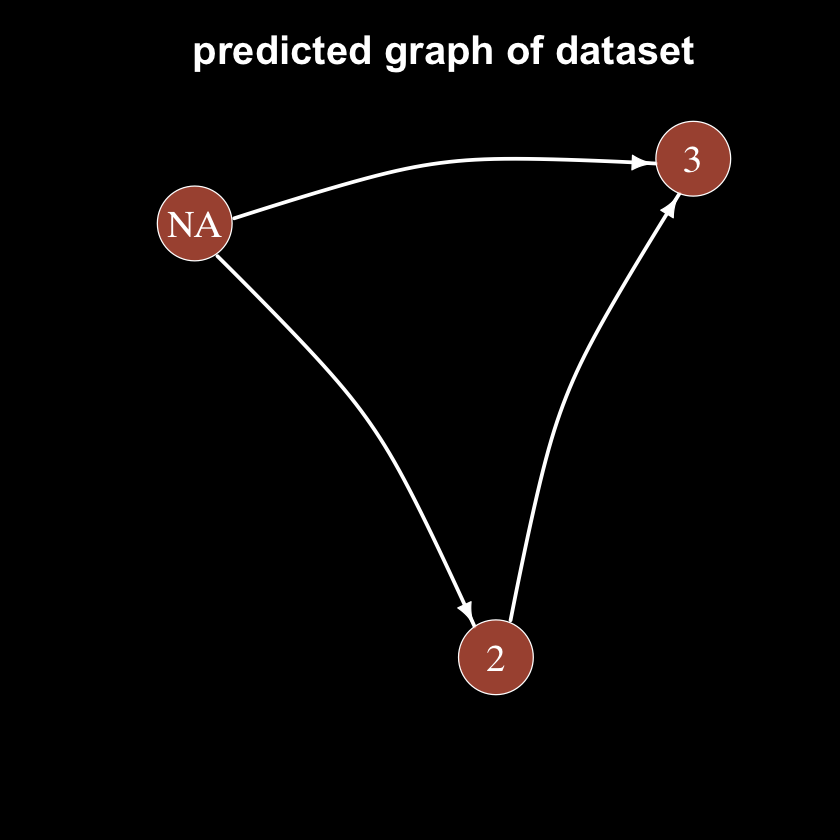

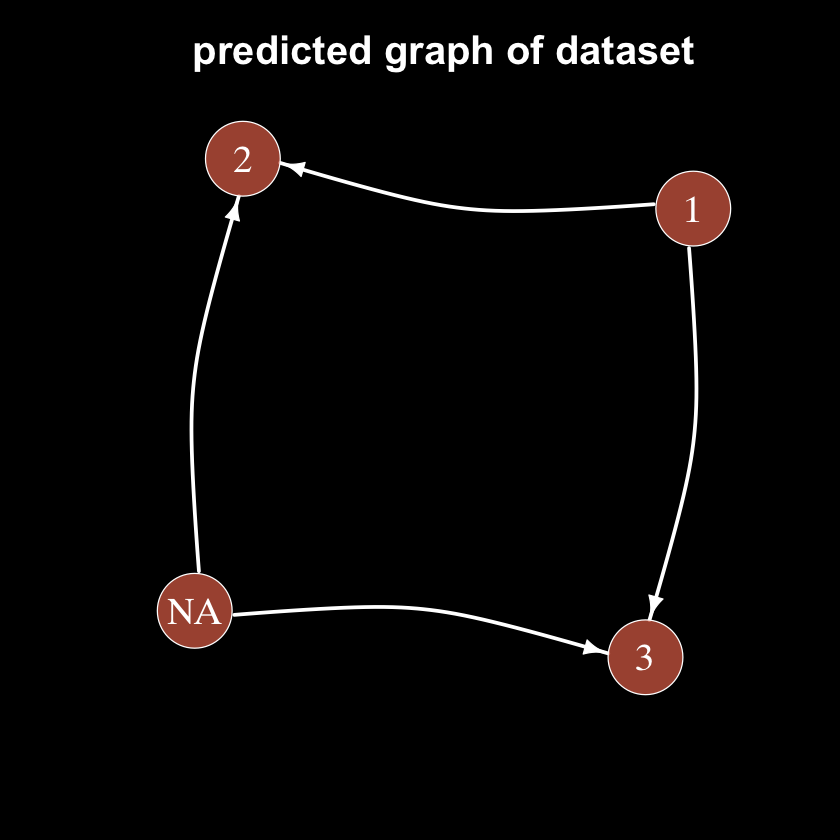

In [152]:
# k2 must return also the relative probability
x1 <- c(1,1,0,1,0,0,1,0,1,0)
x2 <- c(0,1,0,1,0,1,1,0,1,0)
x3<- c(0,1,1,1,0,1,1,0,1,0)

D <- data.frame(x1, x2, x3)
print(D)
orders <- permutations(3, 3, c(1,2,3))
for (order in orders){
    parents <- k2(order, 2, D, show_result = TRUE)
    plot_graph(parents)
}